In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GDF = pd.read_csv('Gauged_Daily_Flow_Data_Tyne_at_Bywell.csv')

In [3]:
GDF.head()

,Date,Daily Ave Flow(m3/s)
0,1956-10-01,54.1
1,1956-10-02,33.7
2,1956-10-03,44.2
3,1956-10-04,52.1
4,1956-10-05,42.8


In [4]:
GDF.shape

(22645, 2)

In [5]:
GDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22645 entries, 0 to 22644
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  22645 non-null  object 
 1   Daily Ave Flow(m3/s)  22449 non-null  float64
dtypes: float64(1), object(1)
memory usage: 265.4+ KB


In [6]:
GDF.describe()

,Daily Ave Flow(m3/s)
count,22449.000000
mean,45.167710
std,59.488278
min,2.480000
25%,12.940000
50%,25.700000
75%,52.500000
max,1450.000000


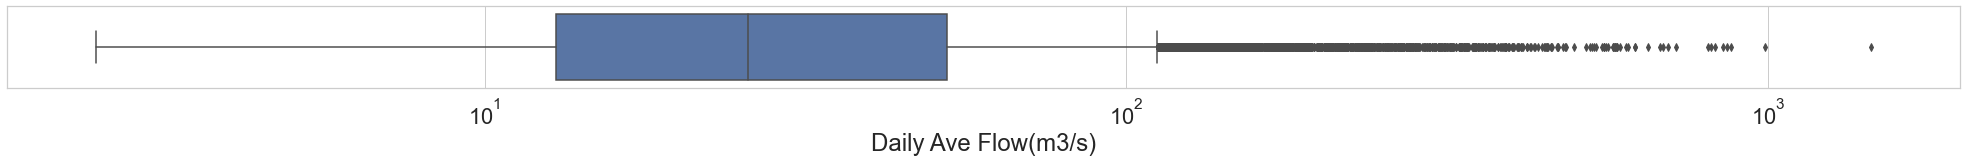

In [7]:
plt.figure(figsize=(35,1.5))
sns.set(style="whitegrid", font_scale=2)
  
boxplot_GDF = sns.boxplot(x=GDF["Daily Ave Flow(m3/s)"])
boxplot_GDF.set_xscale("log")

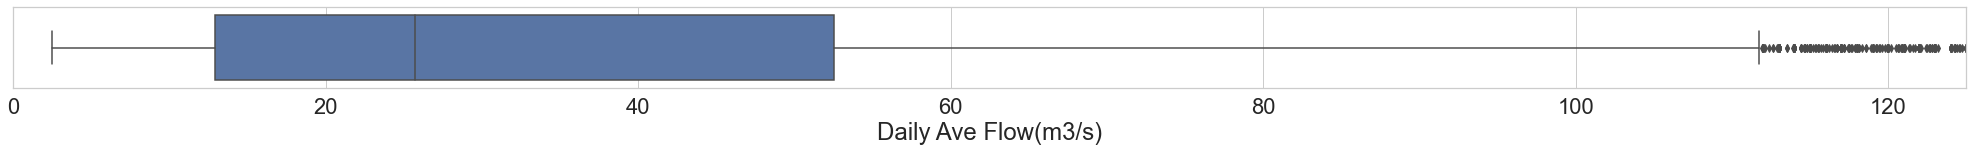

In [8]:
plt.figure(figsize=(35,1.5))
#Reducing the y limits to get better look at main data
plt.xlim(0, 125)
boxplot_GDF = sns.boxplot(x=GDF["Daily Ave Flow(m3/s)"])

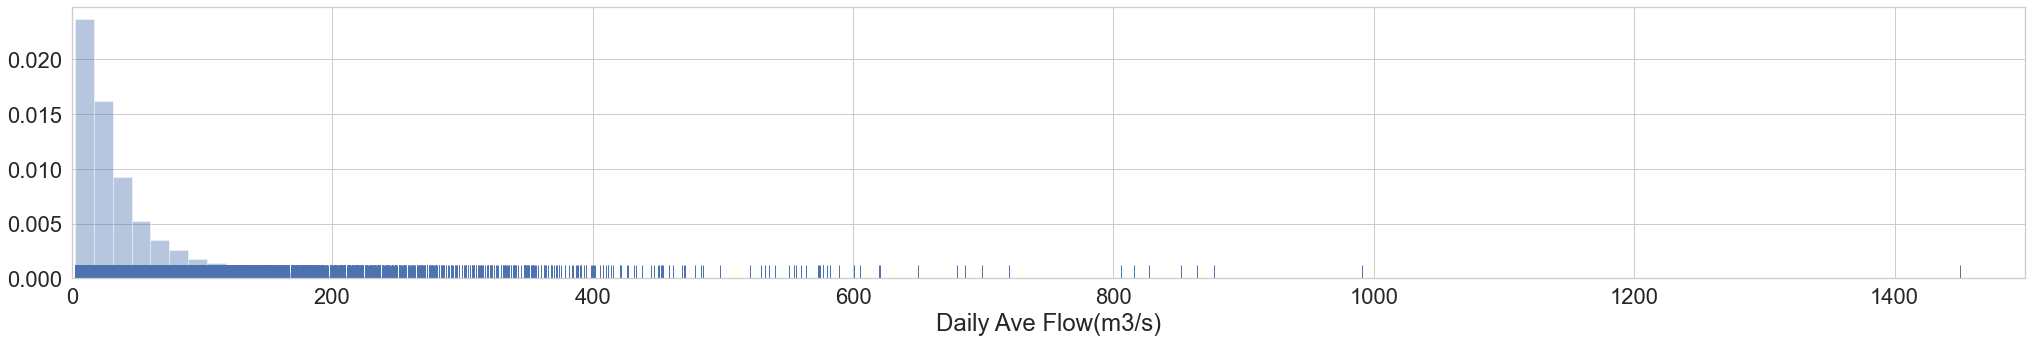

In [9]:
plt.figure(figsize=(35,5))
sns.distplot(GDF["Daily Ave Flow(m3/s)"], bins=100, kde=False, rug=True, norm_hist=True).set(xlim=(0, 1500));

In [12]:
below_equal_200 = GDF[GDF["Daily Ave Flow(m3/s)"] <= 200].count()

In [14]:
above_200 = GDF[GDF["Daily Ave Flow(m3/s)"] > 200].count()